Implement the linear regression model from scratch using gradient descent.

Start with initializing the parameters m (slope) and c (y-intercept) to zero.

Define the loss function as Mean Squared Error (MSE).

Calculate the gradients of the loss function with respect to m and c.

Update the parameters m and c using the gradients and a learning rate.

Iterate the above steps for a fixed number of iterations or until convergence.

Plot the cost function over iterations and observe if it is decreasing.


After the model is trained, predict the output for a given input and compare it with the actual output.


### Linear Regression Basic Steps:

1. Initials weights and bias
2. use the formule W_new = W_old - learning_rate * dE_dW * x
3. repeat until error is minimised

In [45]:
#importing the necessary libraries :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("data.csv")
df.columns = ['x', 'y']
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       99 non-null     float64
 1   y       99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


x    0
y    0
dtype: int64

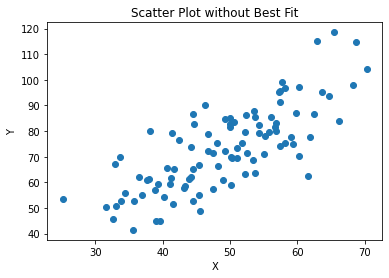

In [47]:

#scatter plot of data points
plt.scatter(df['x'], df['y'])
plt.xlabel("X")
plt.ylabel("Y")

plt.title("Scatter Plot without Best Fit")
plt.show()

from oberserving the datapoints, the relationship between x and y we can see there is a positive correlation, lets try to fit a best fit line using Linear Regression

In [48]:
#Linear Regression 

#basic steps:
#initialise weights and bias
# forward pass 
# calculate loss
# plot loss against m and c 
# calculate derivative of m and c 
# derivative of m = mean(output - target) * input
# derivative of c = mean(output - target)
# update m -> m = m - (learning * derivative of m)
# update c -> c = c - (learning * derivative of c)
# continue until error < 0.0005
# or for 2000 iterations

# for plotting we need to store m , c, errors for each of them

In [49]:
def mse(y, actual):
   return np.mean((y - actual)**2)

In [50]:
#how about we initialise a vector with the same m and same c and then
#calculate sum of squared error

def forward_pass(m , c, train):
    sum_of_squared_error = 0
    dE_dm = 0
    dE_dc = 0
    
    
    for i in range(len(train)):
        #computing y pred
        y = m * train["x"][i] + c

        #computing derivative of error with respect to gradient m
        dE_dm += ((y - train["y"][i])*df["x"][i])
        #computing derivative of error with respect to y-intercept c
        dE_dc += (y - train["y"][i])
        #summing all squared errors 
        sum_of_squared_error += mse(y, df["y"][i])
        
    #normalising the error
    dE_dm = (1 / len(train)) * dE_dm
    dE_dc = (1 / len(train)) * dE_dc
    #print(sum_of_squared_error, "***")
    return sum_of_squared_error, dE_dm, dE_dc


In [51]:
def update_parameters(m , c, learning_rate, dE_dm, dE_dc):
    #updating the gradient 
    new_m = m - learning_rate*dE_dm
    #updating the y intercept
    new_c = c - learning_rate*dE_dc
    return new_m, new_c

In [52]:
def training(train_samples, iterations, tolerance):
    #arrays for storing the parameters of error function and weights as they change for plotting
    error_y_axis = []
    m_x_axis = []
    c_z_axis = []

    #initialising the learning rate, w0 and w1 (the gradient and y-intercept)
    learning_rate = 0.0008
    m = 0
    c = 0
    #to keep a note on how many iterations its taking:
    number_of_iterations = 0

    #the actual training loop
    for i in range(iterations):
        #performing forward pass
        sum_of_squared_error, dE_dm, dE_dc = forward_pass(m, c, train_samples)
        
        error_y_axis.append(sum_of_squared_error)
        m_x_axis.append(m)
        c_z_axis.append(c)
        number_of_iterations += 1
        
        if np.isnan(sum_of_squared_error) or np.isinf(sum_of_squared_error):
            print("Warning: NaN or Inf encountered. Exiting.")
            break
        
        #if tolerance is reached then stop the training
        if sum_of_squared_error < tolerance:
            break
        
        #else update the parameters
        new_m, new_c = update_parameters(m, c, learning_rate, dE_dm, dE_dc)
        m = new_m
        c = new_c
        #print(f"updated m at {i} to {m}")
        #print(f"updated c at {i} to {c}")
    
    
    return m, c, number_of_iterations, error_y_axis, m_x_axis, c_z_axis

In [53]:
#testing loop 
def testing(m, c, test):
    #ini
    y_pred = []
    mse_error = []
    abs_err = []
    print(f"Id\tActual\t\tPredicted\t\tAbsolute Error\t\tSquare Error")
    #iterating over the test data
    for i in range(80, 80+len(test),1):
        #computing y hat 
        y = m * test['x'][i] + c
        y_pred.append(y)
        #computing square error
        error = mse(y, test['y'][i])
        mse_error.append(error)
        #computing absolute error
        abs_error = abs(y - test['y'][i])
        abs_err.append(abs_error)
        print(f"{i-80}\t{test['y'][i]}\t{abs_error}\t{y}\t{error}")

    mean_squared_error = sum(mse_error) / len(mse_error)
    mean_absolute_error = sum(abs_err) / len(abs_err)
    print(f"\n\nMean Absolute Error: {mean_absolute_error}")
    print(f"\n\nMean Squared Error: {mean_squared_error}")



In [54]:
#performing manual train test split
train = df.iloc[:80]
test = df.iloc[80:]
len(train) , len(test)

(80, 19)

In [55]:
#initialising the number of terations and tolerance
iterations = 10000
tolerance = 0.5

#initiating the training loop
m, c, number_of_iterations, error_y_axis, m_x_axis, c_z_axis = training(train, iterations, tolerance)
print(f"Freezed Weights: m = {m} , c = {c}\nnumber of iterations it took = {number_of_iterations}")

Freezed Weights: m = 1.428429381442746 , c = 1.7196255924544082
number of iterations it took = 10000


In [56]:
#lets test the data
testing(m , c , test)

Id	Actual		Predicted		Absolute Error		Square Error
0	83.14274979	0.18991560445282119	82.95283418554718	0.036067936814680436
1	55.72348926	4.961419589327932	50.76206967067207	24.61568434136694
2	77.63418251	8.43382839340893	86.06801090340893	71.12946136947066
3	99.05141484	14.78539219883504	84.26602264116497	218.60782247337207
4	79.12064627	0.13745254495152892	79.25809881495152	0.01889320211365208
5	69.58889785	5.107356307913122	74.69625415791312	26.085088455979957
6	69.51050331	4.034603107071717	73.54510641707172	16.278022231592757
7	73.68756432	8.814587807086667	64.87297651291334	77.69695820884094
8	61.36690454	5.359123217991595	56.007781322008405	28.72020166561659
9	67.17065577	18.397880792424203	48.77277497757579	338.48201765225144
10	85.66820315	7.253862057923627	78.41434109207637	52.61851475538399
11	114.8538712	14.907250339793265	99.94662086020674	222.2261126932664
12	90.12357207	22.36627559645028	67.75729647354972	500.2502840563673
13	97.91982104	1.389186869130782	99.30900790913

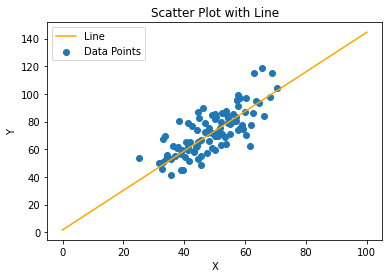

In [57]:
# scatter plot of data points
plt.scatter(df['x'], df['y'], label='Data Points')
plt.xlabel("X")
plt.ylabel("Y")

# plotting the best fit on the scatter plot of data points
x_line = np.linspace(0, 100, 100)
y_line = m * x_line + c
plt.plot(x_line, y_line, color='orange', label='Line')

# Add labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with Line")

# Show legend
plt.legend()

# Show the plot
plt.show()

<Figure size 432x288 with 0 Axes>

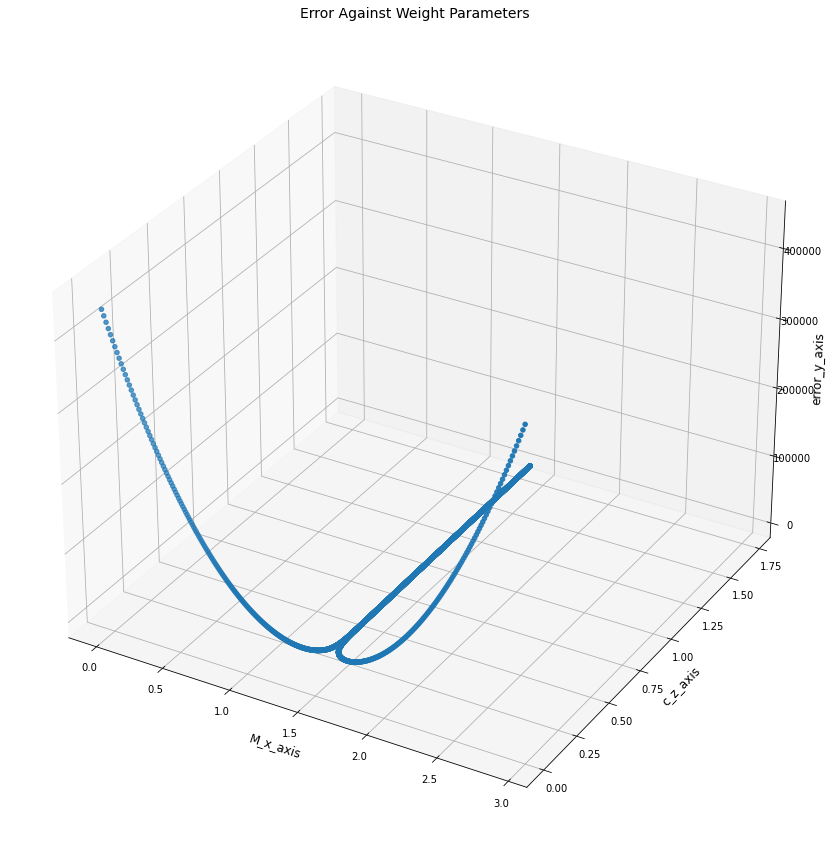

In [58]:
fig = plt.figure()
 
# Set the figure size
fig = plt.figure(figsize=(15, 15))

# Syntax for 3-D projection
ax = fig.add_subplot(111, projection='3d')
 
# defining all 3 axis
# error_y_axis, m_x_axis, c_z_axis 
z = error_y_axis
x = m_x_axis
y = c_z_axis 
 
# plotting
ax.scatter(x, y, z)

ax.set_xlabel('M_x_axis', fontsize=12)
ax.set_ylabel('c_z_axis', fontsize=12)
ax.set_zlabel('error_y_axis', fontsize=12)
plt.title('Error Against Weight Parameters', fontsize=14)

plt.show()

In [59]:
'''
Notes for updating the learning rate based on output of my model
the model failed at learning rate > 0.0008 as gradient descent started fluctuate

0.0003
8947.899412529214 ***
updated m at 9999 to 1.4481417911259338
updated c at 9999 to 0.7180004661077759

0.0005
8933.679029483359 ***
updated m at 9999 to 1.4398472205115744
updated c at 9999 to 1.1394634162555712

0.00075
8918.449643548596 ***
updated m at 9999 to 1.4302513475660659
updated c at 9999 to 1.6270480193519723

0.0008
8915.706120301342 ***
updated m at 9999 to 1.428429381442746
updated c at 9999 to 1.7196255924544082

'''

'\nNotes for updating the learning rate based on output of my model\nthe model failed at learning rate > 0.0008 as gradient descent started fluc\n\n0.0003\n8947.899412529214 ***\nupdated m at 9999 to 1.4481417911259338\nupdated c at 9999 to 0.7180004661077759\n\n0.0005\n8933.679029483359 ***\nupdated m at 9999 to 1.4398472205115744\nupdated c at 9999 to 1.1394634162555712\n\n0.00075\n8918.449643548596 ***\nupdated m at 9999 to 1.4302513475660659\nupdated c at 9999 to 1.6270480193519723\n\n0.0008\n8915.706120301342 ***\nupdated m at 9999 to 1.428429381442746\nupdated c at 9999 to 1.7196255924544082\n\n'